# Imports et prétraitements

---

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
#import de la bd

df = pd.read_csv("healthcare-dataset-stroke-data.csv")

#Traitement des données

id = df[df["gender"] == "Other"].index
df = df.drop(id)


# À quel âge sommes-nous le plus à risque de faire un AVC?

---

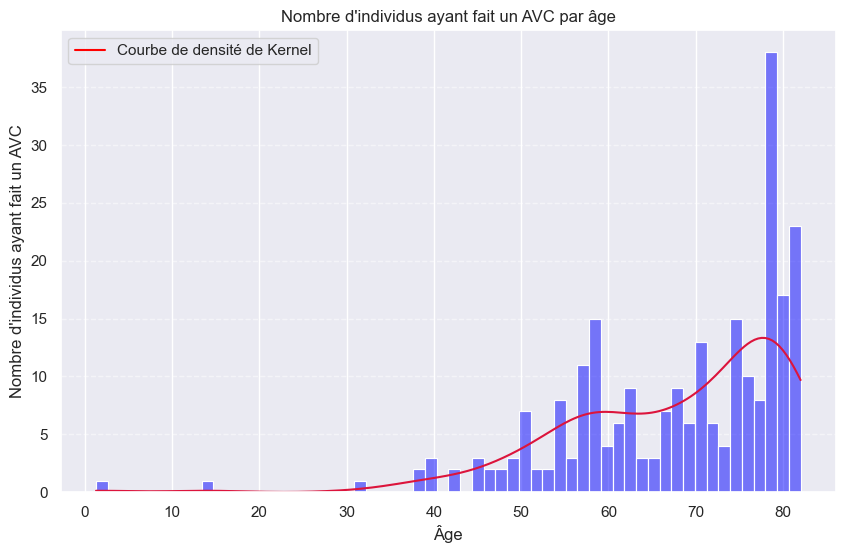

In [67]:
"""1ere option"""

# Filtrer les données pour ne conserver que les personnes victimes d'AVC et leur âge
strokes_age = df[["stroke", "age"]]
strokes_age = strokes_age[strokes_age["stroke"] == 1]

# Créer un histogramme des âges pour les personnes décédées
plt.figure(figsize=(10, 6))
ax = sns.histplot(data=strokes_age, x='age', bins=60, color='blue', kde = True)    #Modifier par True si on veut la courbe de densité de kernel
ax.lines[0].set_color('crimson')
plt.title('Nombre d\'individus ayant fait un AVC par âge')
plt.xlabel('Âge')
plt.ylabel('Nombre d\'individus ayant fait un AVC')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.plot([], [], color='red', label='Courbe de densité de Kernel')
plt.legend()
plt.show()

In [ ]:
"""2eme option"""

#Filtrer les données pour ne conserver que les personnes victimes d'AVC et leur âge
strokes_age = df[["stroke", "age"]]
strokes_age = strokes_age[strokes_age["stroke"] == 1]


# Créer un tracé de densité des âges pour les personnes décédées
plt.figure(figsize=(10, 6))
sns.kdeplot(data=strokes_age['age'], shade=True, color='red')
plt.title('Nombre d\'individus ayant fait un AVC par âge')
plt.xlabel('Âge')
plt.ylabel('Densité')
plt.grid(axis='y', linestyle='--', alpha=0)
plt.show()

# Le sexe à-t-il une conséquence sur le risque d'AVC?
---

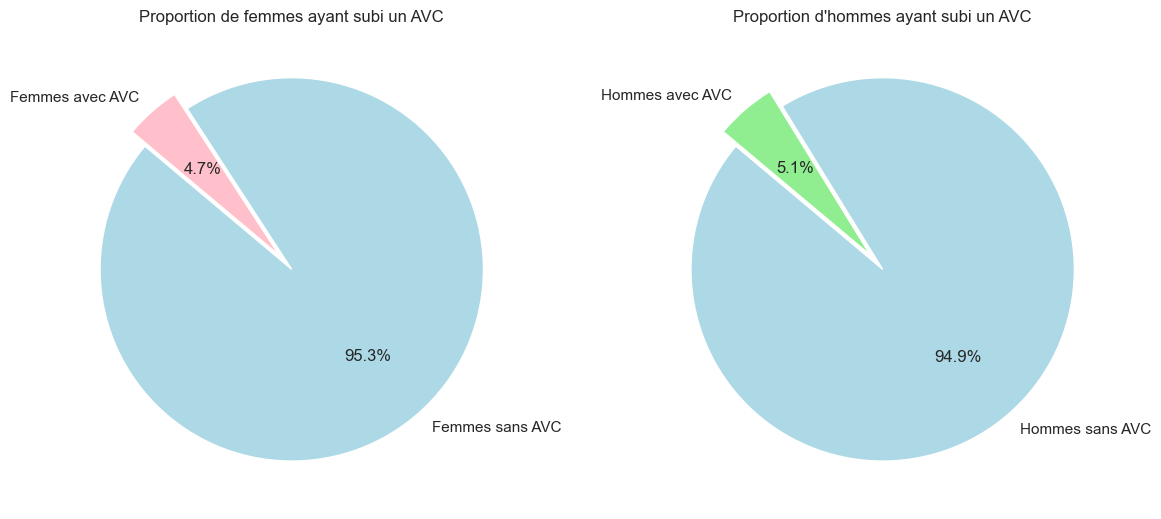

In [70]:
femmes = df[df["gender"] == "Female"]
hommes = df[df["gender"]== "Male"]

# Calculer le nombre total de femmes
total_female = len(femmes)

# Calculer le nombre de femmes ayant subi un AVC
female_strokes = femmes[femmes['stroke'] == 1]
total_female_strokes = len(female_strokes)

# Calculer la proportion de femmes ayant subi un AVC
proportion_female_strokes = total_female_strokes / total_female

# Filtrer les données pour ne conserver que les hommes
male_data = df[df['gender'] == 'Male']

# Calculer le nombre total d'hommes
total_male = len(male_data)

# Calculer le nombre d'hommes ayant subi un AVC
male_strokes = male_data[male_data['stroke'] == 1]
total_male_strokes = len(male_strokes)

# Calculer la proportion d'hommes ayant subi un AVC
proportion_male_strokes = total_male_strokes / total_male

# Créer une nouvelle figure et des sous-graphiques
plt.figure(figsize=(12, 6))

# Sous-graphique pour les femmes
plt.subplot(1, 2, 1)
labels_female = ['Femmes sans AVC', 'Femmes avec AVC']
sizes_female = [total_female - total_female_strokes, total_female_strokes]
colors_female = ['lightblue', 'pink']
explode_female = (0, 0.1)
plt.pie(sizes_female, explode=explode_female, labels=labels_female, colors=colors_female, autopct='%1.1f%%', startangle=140)
plt.title('Proportion de femmes ayant subi un AVC')

# Sous-graphique pour les hommes
plt.subplot(1, 2, 2)
labels_male = ['Hommes sans AVC', 'Hommes avec AVC']
sizes_male = [total_male - total_male_strokes, total_male_strokes]
colors_male = ['lightblue', 'lightgreen']
explode_male = (0, 0.1)
plt.pie(sizes_male, explode=explode_male, labels=labels_male, colors=colors_male, autopct='%1.1f%%', startangle=140)
plt.title('Proportion d\'hommes ayant subi un AVC')

plt.tight_layout()  # Pour éviter que les graphiques ne se chevauchent
plt.show()